# Challenge Set 3

## Table of Contents


<a href='#q1'>Q1</a>  
<a href='#q2'>Q2</a>  
<a href='#q3'>Q3</a>  
<a href='#q4'>Q4</a>  
<a href='#q5'>Q5</a>  

import pandas as pd
import math
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import patsy
import numpy as np

%matplotlib inline
import seaborn as sb


In [78]:
df = pd.read_csv('2013_movies.csv')

<a id='q1'></a>
## Challenge 1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?


In [79]:
df['Constant'] = 1

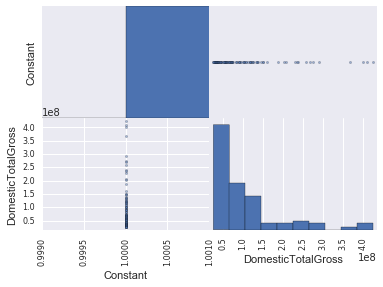

In [80]:
pd.tools.plotting.scatter_matrix(df[['Constant', 'DomesticTotalGross']])
print ' '

In [153]:
y, X = dmatrices('DomesticTotalGross ~ Constant', data=df, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train, hasconst=False)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     95.04
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           1.32e-14
Time:                        16:27:27   Log-Likelihood:                -1382.5
No. Observations:                  70   AIC:                             2767.
Df Residuals:                      69   BIC:                             2769.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5.366e+07    5.5e+06      9.749      0.0

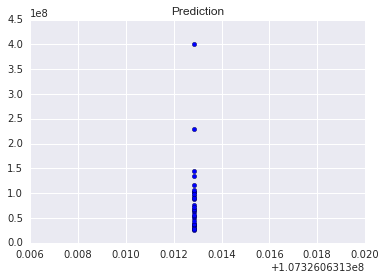

In [154]:
pred = results.predict(X_test)

plt.scatter(pred, y_test)
plt.title("Prediction vs Actual")
plt.show()

In [155]:
y_test.reset_index(inplace=True)

In [156]:
residuals = {}
for i in range(0,30):
    residuals[i] = y_test.DomesticTotalGross[i] - pred[i]

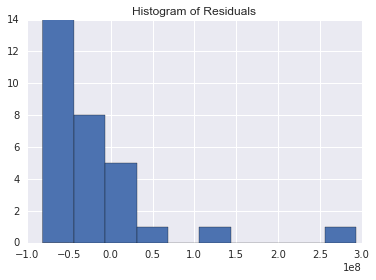

In [157]:
plt.hist(residuals.values())
plt.title("Histogram of Residuals")
plt.show()

<a id='q2'></a>
## Challenge 2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?


In [159]:
y, X = dmatrices('DomesticTotalGross ~ Constant + Budget', data=df, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train, hasconst=False)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     69.98
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           2.07e-16
Time:                        16:27:57   Log-Likelihood:                -1215.0
No. Observations:                  62   AIC:                             2434.
Df Residuals:                      60   BIC:                             2438.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2.493e+07   8.15e+06      3.058      0.0

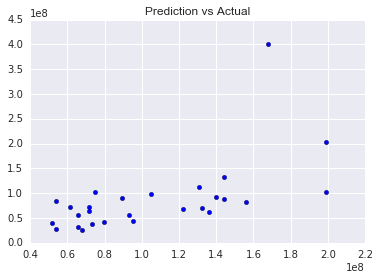

In [161]:
pred = results.predict(X_test)
plt.scatter(pred, y_test)
plt.title("Prediction vs Actual")
plt.show()

<a id='q3'></a>
## Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?


In [162]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Constant
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [171]:
y, X = dmatrices('DomesticTotalGross ~ Constant + Budget + Rating', data=df, return_type='dataframe')
X.tail()

,Intercept,Rating[T.PG],Rating[T.PG-13],Rating[T.R],Constant,Budget
95,1.0,0.0,0.0,1.0,1.0,38000000.0
96,1.0,0.0,1.0,0.0,1.0,40000000.0
97,1.0,0.0,0.0,1.0,1.0,20000000.0
98,1.0,0.0,0.0,1.0,1.0,13000000.0
99,1.0,0.0,0.0,1.0,1.0,23000000.0


In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train, hasconst=False)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:     DomesticTotalGross   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     33.95
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           1.37e-14
Time:                        16:46:25   Log-Likelihood:                -1214.9
No. Observations:                  62   AIC:                             2438.
Df Residuals:                      58   BIC:                             2446.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        2.102e+07   8.12e+06     

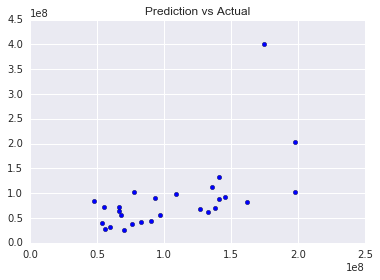

In [173]:
pred = results.predict(X_test)
plt.scatter(pred, y_test)
plt.title("Prediction vs Actual")
plt.show()

<a id='q4'></a>
## Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.


In [178]:
df['dtg_log'] = np.log(df.DomesticTotalGross)
df['budget_log'] = np.log(df.Budget)

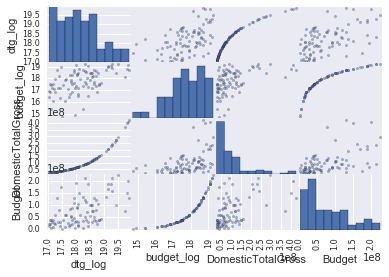

In [183]:
pd.tools.plotting.scatter_matrix(df[['dtg_log', 'budget_log', 'DomesticTotalGross', 'Budget']])
print ' '

In [193]:
y, X = dmatrices('dtg_log ~ budget_log + Rating', data=df, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = sm.OLS(y_train, X_train, hasconst=False)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                dtg_log   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.131e+04
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           3.91e-83
Time:                        17:13:41   Log-Likelihood:                -61.531
No. Observations:                  62   AIC:                             131.1
Df Residuals:                      58   BIC:                             139.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           7.9743      1.458     

<a id='q5'></a>
## Challenge 5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

In [195]:
y, X = dmatrices('dtg_log ~ budget_log + Rating', data=df, return_type='dataframe')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
model = sm.OLS(y_train, X_train, hasconst=False)
results = model.fit()
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                dtg_log   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Tue, 19 Jul 2016   Prob (F-statistic):           1.50e-89
Time:                        17:15:27   Log-Likelihood:                -63.901
No. Observations:                  66   AIC:                             135.8
Df Residuals:                      62   BIC:                             144.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           8.3056      1.333     

In [198]:
p = results.predict(X_test)

In [212]:
y_test.values

array([[ 17.83639658],
       [ 17.50543154],
       [ 17.9730516 ],
       [ 17.93839708],
       [ 17.28173968],
       [ 17.42423176],
       [ 17.8527907 ],
       [ 18.23469   ],
       [ 18.08309557],
       [ 18.30535109],
       [ 18.24139195],
       [ 18.43854921],
       [ 17.61487457],
       [ 18.53579419],
       [ 17.05686194],
       [ 18.02540155],
       [ 19.12555742],
       [ 19.80881843],
       [ 18.31852301],
       [ 17.55377845],
       [ 18.07844088],
       [ 18.70252218],
       [ 17.12233444]])

In [213]:
zipped = zip(p, y_test.values)

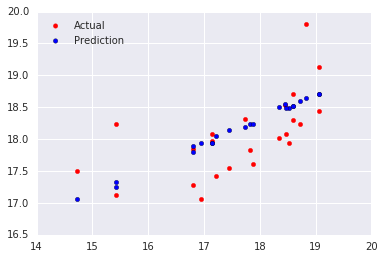

In [238]:
plt.scatter(X_test.budget_log.values, y_test.values, color='red', label="Actual")
plt.scatter(X_test.budget_log.values, p, label="Prediction")
plt.legend(loc='upper left')
plt.show()